In [78]:
import mechanize

br = mechanize.Browser()
br.open("http://stev.oapd.inaf.it/cgi-bin/cmd_3.7")

<response_seek_wrapper at 0x7f25c1e3c760 whose wrapped object = <closeable_response at 0x7f25c1e3c220 whose fp = <_io.BufferedReader name=66>>>

In [79]:
br.select_form(action='./cmd_3.7')

In [80]:
br['isoc_agelow'] = '6.5e9'

In [84]:
br['photsys_file'] = ['YBC_tab_mag_odfnew/tab_mag_gaiaEDR3.dat']

In [85]:
response2 = br.submit()

In [86]:
from mechanize._html import content_parser

In [87]:
html = content_parser(response2.get_data())

In [88]:
html.find('a')

In [89]:
html.find("body").find("form")

<Element 'form' at 0x7f25c138d540>

In [90]:
for child in html.find("body").find("form").find("fieldset").find("p"):
    print(child.tag, child.attrib)

br {}
br {}
a {'href': '../tmp/output645783964851.dat'}


In [91]:
output_href = html.find("body").find("form").find("fieldset").find("p").find("a").attrib['href'].split('./')[-1]

In [92]:
import requests as re
import numpy as np
import io
import matplotlib.pyplot as plt

In [93]:
output_href

'tmp/output645783964851.dat'

In [94]:
r = re.get(f'http://stev.oapd.inaf.it/{output_href}', allow_redirects=True)

In [95]:
open('isochrone.dat', 'wb').write(r.content)

79638

In [96]:
a = np.loadtxt('isochrone.dat', usecols=(28, 29, 30))

In [97]:
a.shape

(301, 3)

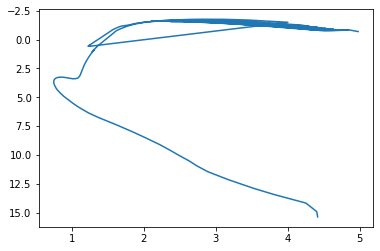

In [98]:
plt.plot(a[:-1, 1]-a[:-1, 2], a[:-1, 0])
plt.gca().invert_yaxis();